## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
#1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>

import numpy as np
#2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>

import matplotlib.pyplot as plt
#3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

import sklearn
#4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
#    - <https://scikit-learn.org/stable/user_guide.html>

## 데이터 내의 결측값들을 제거합니다.

In [2]:
pd.set_option('display.max_columns', None)
# pandas dataframe의 모든 열을 출력하기 위한 설정입니다.

df = pd.read_csv('tox21_dataset.csv')
# 이 주피터파일과 같은 디렉터리에 존재하는 'tox21_dataset.csv' 파일을 읽어와 df에 저장합니다.

df = df.dropna(subset=['NR-AR'])
# 'NR-AR' 열에 결측치가 존재하는 행을 제거합니다.
#   우리가 분석하고자 하는 'NR-AR' 열에 결측치가 존재하는 행은 분석에 방해가 될 수 있기 때문에 제거합니다.
#   결측지까지 제거된 데이터가 제공되었기 때문에 이 과정은 생략해도 됩니다.


df
# 데이터프레임을 출력합니다.
#   주피터 노트북에서는 print() 함수를 사용하지 않아도 마지막 열에 입력된 행을 출력합니다.

,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

In [3]:
X = df.iloc[:, :-1]
# 독립 변수를 X에 저장합니다. 독립 변수는 'NR-AR' 열을 제외한 나머지 열입니다.

y = df.iloc[:, -1]
# 종속 변수를 y에 저장합니다. 종속 변수는 'NR-AR' 열입니다.

## 모델을 생성합니다.

In [4]:
from sklearn.tree import DecisionTreeClassifier
# decision tree classifier를 사용하기 위한 라이브러리를 불러옵니다.

# 결정 트리 모델을 생성합니다.
model = DecisionTreeClassifier(max_depth=3, random_state=42)
# 결정 트리 모델을 생성하고, 모델을 model에 저장합니다.
model.fit(X, y)
# 모델을 학습시킵니다.

DecisionTreeClassifier(max_depth=3, random_state=42)


선택한 모델은 decision tree classifier입니다. 
- decision tree는 데이터를 분류하는 모델로, 데이터를 분류하기 위해 질문을 던지며, 이 질문에 대한 답변에 따라 데이터를 분류합니다. 여기서 질문은 데이터의 특성을 기준으로 합니다.
전처리를 수행한 데이터에 대해서 decision tree classifier을 학습시키고, 학습된 모델을 사용하여 예측을 수행해보겠습니다.

## decision tree classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수 (지니 불순도)
$$
I_G(t) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$

1. max_depth : 트리의 최대 깊이
2. min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
3. min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수
4. max_features : 최적의 분할을 위해 고려할 최대 피처 개수
5. max_leaf_nodes : 리프노드의 최대 개수
6. min_impurity_decrease : 불순도 감소 최소량
7. class_weight : 클래스 가중치
8. ccp_alpha : 최소 비용 복잡성 가지치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수
- 위의 하이퍼파라미터들은 모두 트리의 복잡도를 조절하는데 사용됩니다. 자세한 내용은 아래의 링크를 참고하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- 지니 불순도는 결정 트리의 leaf node에 하나의 클래스만 몰려있는 정도를 평가하는 metric 입니다. 자세한 내용은 아래의 링크를 참조하세요.
  - <https://en.wikipedia.org/wiki/Decision_tree_learning>

## decision tree classifier의 시각화

위 그림은 결정나무의 시각화 결과입니다. 이를 통해 어떤 특성이 가장 중요한지 알 수 있습니다. 또한, 특성의 중요도를 확인할 수 있습니다.

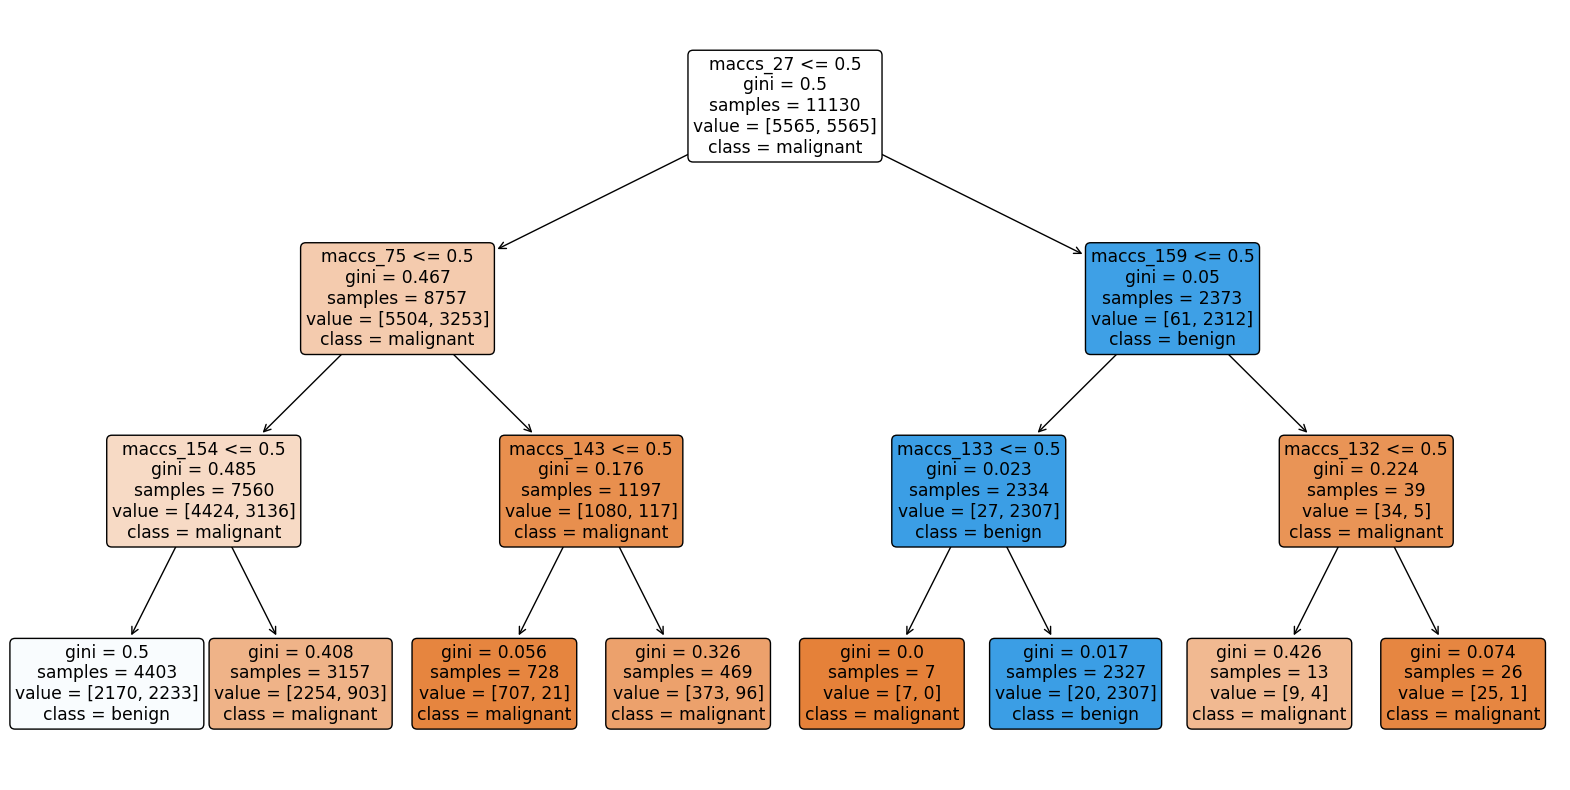

In [5]:
from sklearn.tree import plot_tree
# 결정 트리를 시각화하기 위한 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
# 시각화를 위한 라이브러리를 불러옵니다.

plt.figure(figsize=(20,10))  # 플롯 사이즈 조정
plot_tree(model, filled=True, feature_names=X.columns, class_names=["malignant", "benign"], rounded=True)
# 결정 트리를 시각화합니다.
#  filled=True: 노드의 색을 클래스에 따라 다르게 표시합니다.
#  feature_names=X.columns: 독립 변수의 이름을 표시합니다.
#  class_names=["malignant", "benign"]: 종속 변수의 클래스 이름을 표시합니다.
#  rounded=True: 노드의 모양을 둥글게 표시합니다.
plt.show()
# 시각화를 출력합니다.

## 결정 경계 시각화

아래는 PCA를 사용하여 피처를 2개로 줄인 후 decision tree classifier을 학습한 결과입니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다. 

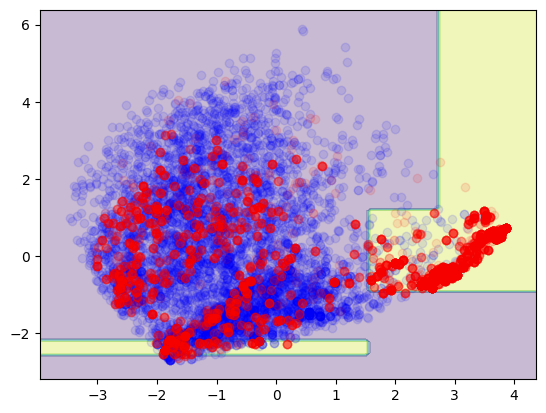

array([[5267,  298],
       [2404, 3161]])

In [6]:
from sklearn.decomposition import PCA
# PCA를 사용하기 위한 라이브러리를 불러옵니다.
from sklearn.metrics import confusion_matrix
# confusion matrix를 사용하기 위한 라이브러리를 불러옵니다.



# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
# PCA를 생성하고, 2개의 주성분을 사용하도록 설정합니다.
X_pca = pca.fit_transform(X)
# PCA를 사용하여 X를 변환합니다.



# 결정 트리 모델 학습
model_pca = DecisionTreeClassifier(max_depth=3, random_state=42)
# 결정 트리 모델을 생성하고, 모델을 model_pca에 저장합니다.
model_pca.fit(X_pca, y)
# 모델을 학습시킵니다.



# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열
y_pred = model_pca.predict(X_new).reshape(x1.shape)
# y_pred: X_new를 사용하여 예측한 후, x1의 모양으로 변환한 배열



plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.show()
# 시각화를 출력합니다.


confusion_matrix(y, model_pca.predict(X_pca))
# confusion matrix를 출력합니다.

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.

In [7]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[3375, 2190],
       [1025, 4540]])

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 3375개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 2190개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 1025개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 4540개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)
